In [12]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Bagging Classifier with Random Forest
bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train_scaled, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test_scaled))

# AdaBoost Classifier (Fix: n_estimator -> n_estimators)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_scaled, y_train)
ada_acc = accuracy_score(y_test, ada.predict(X_test_scaled))

# Gradient Boosting Classifier (Fix: n_estimator -> n_estimators)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test_scaled))

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test_scaled))



C:\Users\tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:16:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data=load_breast_cancer()
X,y=data.data,data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
results_df=pd.DataFrame({
    "Model":["Bagging","AdaBoost","Gradient Boosting","XGBoosting"],
    "Accuracy":[bagging_acc,ada_acc,gb_acc,xgb_acc]
})
results_df

,Model,Accuracy
0,Bagging,0.964912
1,AdaBoost,0.964912
2,Gradient Boosting,0.956140
3,XGBoosting,0.956140


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [27]:
# Load dataset
df = pd.read_csv("C:\\Users\\tejas\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop customer ID (not useful for prediction)
df.drop(columns=['customerID'], inplace=True)


In [28]:
# Convert 'TotalCharges' to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fix the warning: Use proper inplace method
df.loc[:, 'TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target variable
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Define models (Fixed base_estimator -> estimator)
models = {
    "Bagging": BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [32]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store results
    results[name] = {"Accuracy": acc, "Confusion Matrix": cm, "Classification Report": cr, "ROC-AUC": roc_auc}
    
    # Print results
    print(f"\n=== {name} Classifier ===")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print(f"ROC-AUC Score: {roc_auc:.4f}")


=== Bagging Classifier ===
Accuracy: 0.7899
Confusion Matrix:
 [[929 106]
 [190 184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8338

=== AdaBoost Classifier ===
Accuracy: 0.7949
Confusion Matrix:
 [[922 113]
 [176 198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC Score: 0.8432

=== GradientBoosting Classifier ===
Accuracy: 0.8013
Confusion Matrix:
 [[940 

C:\Users\tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:09:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Classifier ===
Accuracy: 0.7786
Confusion Matrix:
 [[904 131]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.60      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC Score: 0.8185


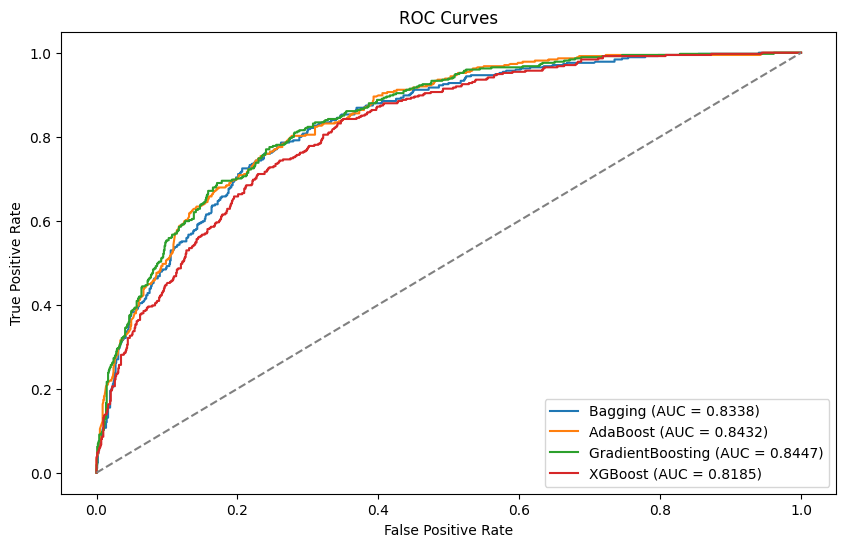

In [33]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['ROC-AUC']:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()